# 数组的计算：广播

前面介绍了 `NumPy` 如何通过通用函数的向量化操作来减少缓慢的 `Python` 循环，另外一种向量化操作的方法是利用 `NumPy` 的广播功能。  
广播可以简单理解为用于不同大小数组的二进制通用函数（加、减、乘等）的一组规则。

In [1]:
import numpy as np

np.random.seed(0)

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
  img {width:30%; height: 30%;}
</style>

## 1. 广播的介绍

对于同样大小的数组，二进制操作是对相应元素逐个计算

In [3]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [4]:
a + 5

array([5, 6, 7])

广播允许这些二进制操作可以用于不同大小的数组。例如，可以简单地将一个标量（可以认为是一个零维的数组）和一个数组相加。我们可以认为这个操作是将数值 5 扩展或重复至数组 [5, 5, 5]，然后执行加法。  
`NumPy` 广播功能的好处是，这种对值的重复实际上并没有发生，但是这是一种很好用的理解广播的模型。  
我们同样也可以将这个原理扩展到更高维度的数组。观察以下将一个一维数组和一个二维数组相加的结果。

In [5]:
M = np.ones((3,3))
print(M)

M + a  # 这里这个一维数组就被扩展或者广播了。它沿着第二个维度扩展，扩展到匹配 M 数组的形状。

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

以上的这些例子理解起来都相对容易，更复杂的情况会涉及对两个数组的同时广播，例如以下示例：

In [6]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)

a + b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

正如此前将一个值扩展或广播以匹配另外一个数组的形状，这里将 a 和 b 都进行了扩展来匹配一个公共的形状，最终的结果是一个二维数组。
以上这些例子的几何可视化如下图所示。
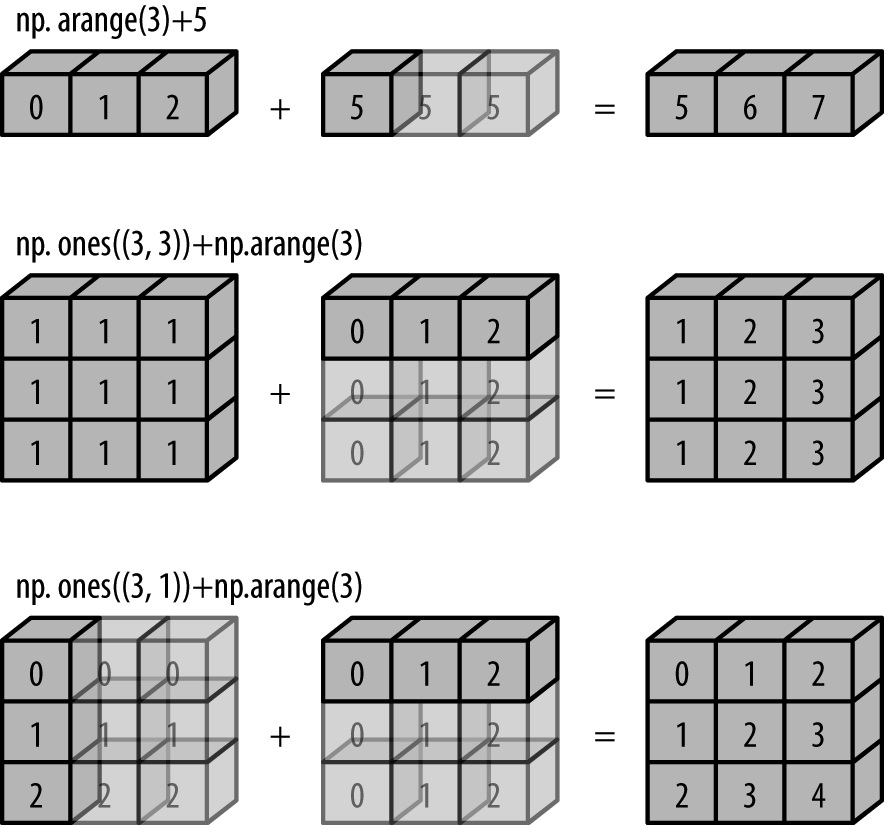
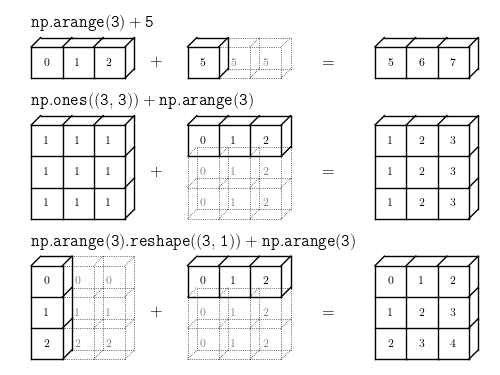

## 2. 广播的规则

`NumPy` 的广播遵循一组严格的规则，设定这组规则是为了决定两个数组间的操作。

- 规则 1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补 1。
- 规则 2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为 1 的维度扩展以匹配另外一个数组的形状。
- 规则 3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于 1，那么会引发异常。

### 2.1. 广播示例1

两个数组的形状如下：
> M.shape -> (2, 3)  
> a.shape -> (3,)

根据规则 1，数组 a 的维度数更小，所以在其左边补1：
> M.shape -> (2, 3)  
> a.shape -> (1, 3)

根据规则 2，第一个维度不匹配，因此扩展这个维度以匹配数组：
> M.shape -> (2, 3)  
> a.shape -> (2, 3)

现在两个数组的形状匹配了，可以看到它们的最终形状都为 (2, 3)：

In [7]:
M = np.ones((2,3))
a = np.arange(3)
print(M)
print(a)

M + a

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.]])

### 2.2. 广播示例2

来看两个数组均需要广播的示例：  
同样，首先写出两个数组的形状：
> a.shape -> (3, 1)  
> b.shape -> (3,)

规则 1 告诉我们，需要用 1 将 b 的形状补全：
> a.shape -> (3, 1)  
> b.shape -> (1, 3)

规则 2 告诉我们，需要更新这两个数组的维度来相互匹配：
> a.shape -> (3, 3)  
> b.shape -> (3, 3)

因为结果匹配，所以这两个形状是兼容的，可以看到以下结果：

In [8]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a)
print(b)

a + b

[[0]
 [1]
 [2]]
[0 1 2]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 2.3. 广播示例3

现在来看一个两个数组不兼容的示例：  
和第一个示例相比，这里有个微小的不同之处：矩阵 M 是转置的。  
那么这将如何影响计算呢？两个数组的形状如下：
> M.shape -> (3, 2)  
> a.shape -> (3,)

同样，规则 1 告诉我们，a 数组的形状必须用 1 进行补全：
> M.shape -> (3, 2)  
> a.shape -> (1, 3)

根据规则 2，a 数组的第一个维度进行扩展以匹配 M 的维度：
> M.shape -> (3, 2)  
> a.shape -> (3, 3)

现在需要用到规则 3——最终的形状还是不匹配，因此这两个数组是不兼容的。当我们执行运算时会看到以下结果：

In [9]:
M = np.ones((3,2))
a = np.arange(3)
print(M)
print(a)

M + a

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

请注意，这里可能发生的混淆在于：你可能想通过在 a 数组的右边补 1，而不是左边补 1，让 a 和 M 的维度变得兼容。  
但是这不被广播的规则所允许。这种灵活性在有些情景中可能会有用，但是它可能会导致结果模糊。  
如果你希望实现右边补全，可以通过变形数组来实现：

In [10]:
print(a[:,np.newaxis].shape)

M + a[:,np.newaxis]

(3, 1)


array([[1., 1.],
       [2., 2.],
       [3., 3.]])

另外也需要注意，这里仅用到了 + 运算符，而这些广播规则对于任意二进制通用函数都是适用的。  
例如这里的 `logaddexp(a, b)` 函数，比起简单的方法，该函数计算 `log(exp(a) + exp(b))` 更准确：

In [11]:
np.logaddexp(M, a[:,np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

In [12]:
np.log(np.exp(M)) + np.log(np.exp(a[:,np.newaxis]))

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## 3. 广播的实际应用

### 3.1. 数组的归一化

在前面我们看到通用函数让 `NumPy` 用户免于写很慢的 `Python` 循环。  
广播进一步扩展了这个功能，一个常见的例子就是数组数据的归一化。

In [13]:
X = np.random.random((10,3))  # 假设你有一个有 10 个观察值的数组，每个观察值包含 3 个数值。按照惯例，我们将用一个 10×3 的数组存放该数据
Xmean = X.mean(0)             # 计算每个特征的均值
print(Xmean)
X_centered = X - Xmean        # 通过从 X 数组的元素中减去这个均值实现归一化（该操作是一个广播操作）
X_centered.mean(0)            # 进一步核对我们的处理是否正确，可以查看归一化的数组的均值是否接近 0

[0.52101579 0.62614181 0.59620338]


array([1.11022302e-17, 1.22124533e-16, 3.33066907e-17])

### 3.2. 画一个二维函数

广播另外一个非常有用的地方在于，它能基于二维函数显示图像。

In [14]:
# 我们希望定义一个函数 z = f (x, y)，可以用广播沿着数值区间计算该函数：
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:,np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

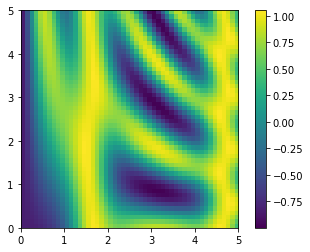

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()